In [1]:
!pip install --upgrade scikit-learn==1.3.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 80.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
print(__import__('sklearn').__version__)

1.3.1


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder, TargetEncoder
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e12/sample_submission.csv
/kaggle/input/playground-series-s4e12/train.csv
/kaggle/input/playground-series-s4e12/test.csv


In [4]:
df_train = pd.read_csv('/kaggle/input/playground-series-s4e12/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s4e12/test.csv')

# Data Exploration

In [5]:
df_train.isna().sum()[df_train.isna().sum() > 0]

Age                      18705
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Occupation              358075
Health Score             74076
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Customer Feedback        77824
dtype: int64

In [6]:
df_test.isna().sum()[df_test.isna().sum() > 0]

Age                      12489
Annual Income            29860
Marital Status           12336
Number of Dependents     73130
Occupation              239125
Health Score             49449
Previous Claims         242802
Vehicle Age                  3
Credit Score             91451
Insurance Duration           2
Customer Feedback        52276
dtype: int64

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [8]:
def plot_histogram(df, column, bins=10, title=None, xlabel=None, ylabel='Frequency', figsize=(10, 6), color='skyblue', kde=False, print_mean_median=False):
    """
    plots a histogram for a specified column in a DataFrame using Seaborn.

    Args:
        df (pd.DataFrame): the DataFrame containing the data.
        column (str): the column to plot.
        bins (int): number of bins for the histogram (default is 10).
        title (str): title of the plot (default is None).
        xlabel (str): label for the x-axis (default is None).
        ylabel (str): label for the y-axis (default is 'Frequency').
        figsize (tuple): size of the figure (default is (10, 6)).
        color (str): color of the bars (default is 'skyblue').
        kde (bool): whether to overlay a Kernel Density Estimate (default is False).
        print_mean_median (bool): wheter to print mean and median (default is False)
    """

    if print_mean_median:
        print(f"mean: {df[column].mean():.2f}")
        print(f"median: {df[column].median():.2f}")
        
    sns.set_style('whitegrid')
    
    plt.figure(figsize=figsize)
    
    ax = sns.histplot(df[column], bins=bins, color=color, kde=kde, edgecolor='black', alpha=0.8)
    
    if title:
        ax.set_title(title, fontsize=16, fontweight='bold')
    if xlabel:
        ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    
    plt.show()

# Age

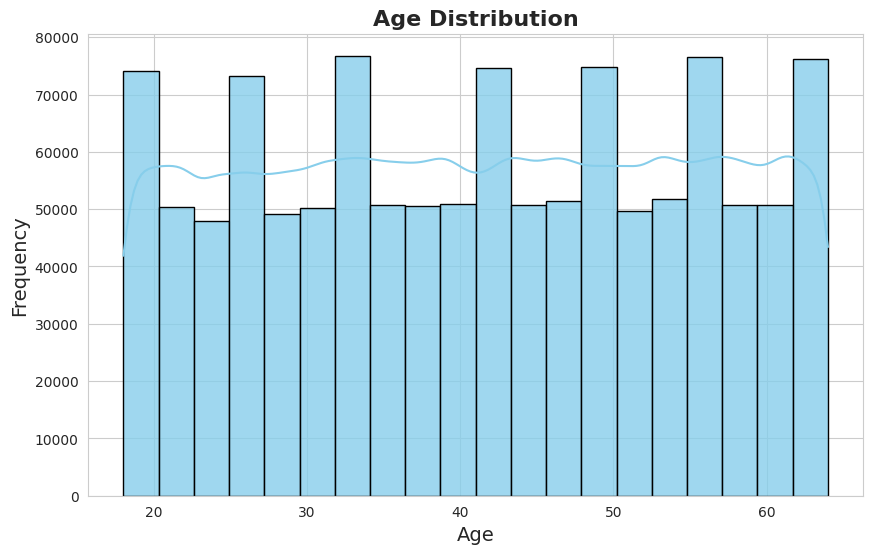

In [9]:
plot_histogram(df_train, 'Age', bins=20, title='Age Distribution', xlabel='Age', kde=True)

mean: 32745.22
median: 23911.00


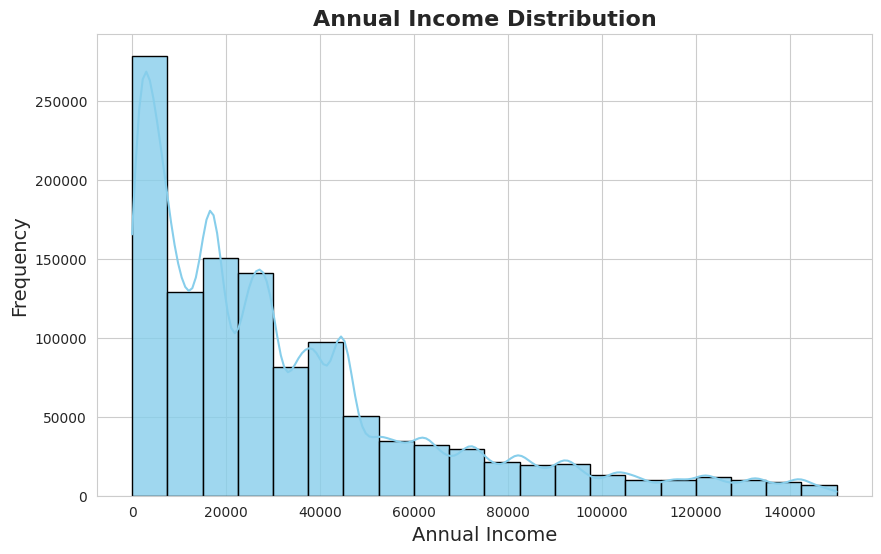

In [10]:
plot_histogram(df_train, 'Annual Income', bins=20, title='Annual Income Distribution', xlabel='Annual Income', kde=True, print_mean_median=True)

mean: 2.01
median: 2.00


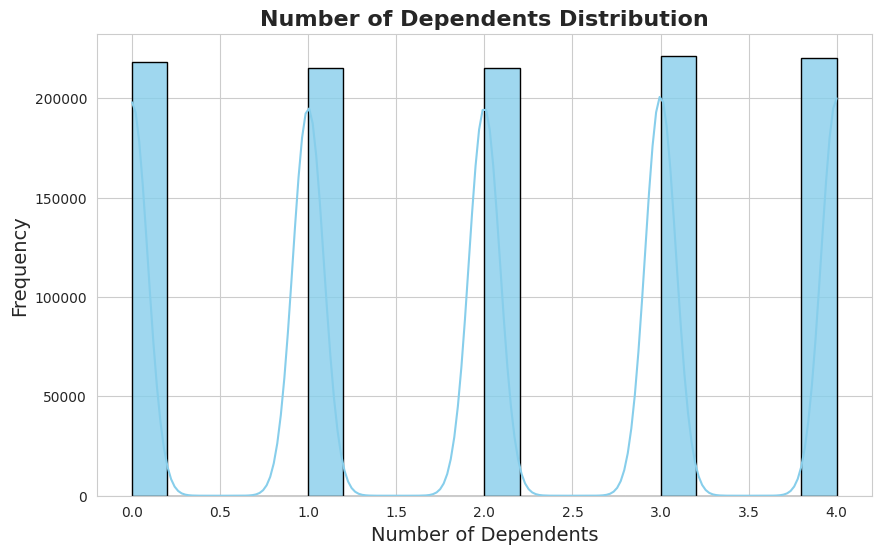

In [11]:
plot_histogram(df_train, 'Number of Dependents', bins=20, title='Number of Dependents Distribution', xlabel='Number of Dependents', kde=True, print_mean_median=True)

mean: 25.61
median: 24.58


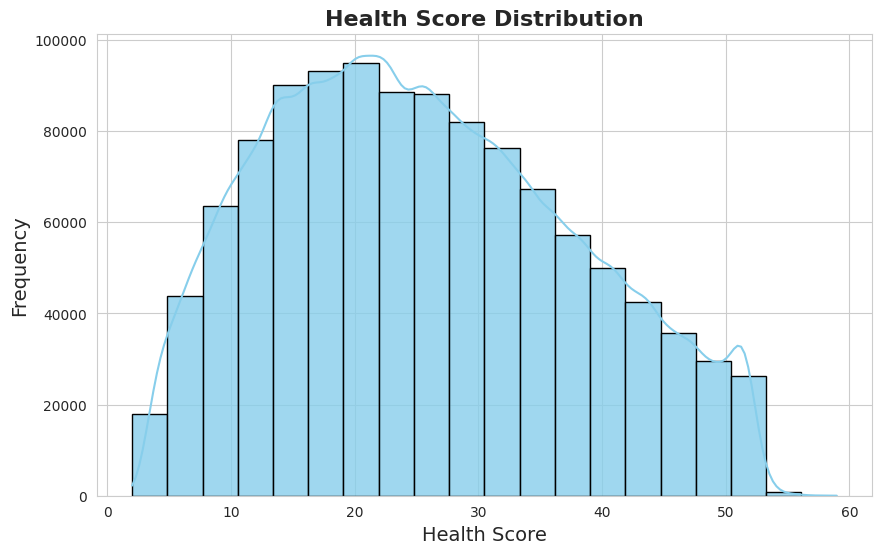

In [12]:
plot_histogram(df_train, 'Health Score', bins=20, title='Health Score Distribution', xlabel='Health Score', kde=True, print_mean_median=True)

mean: 1.00
median: 1.00


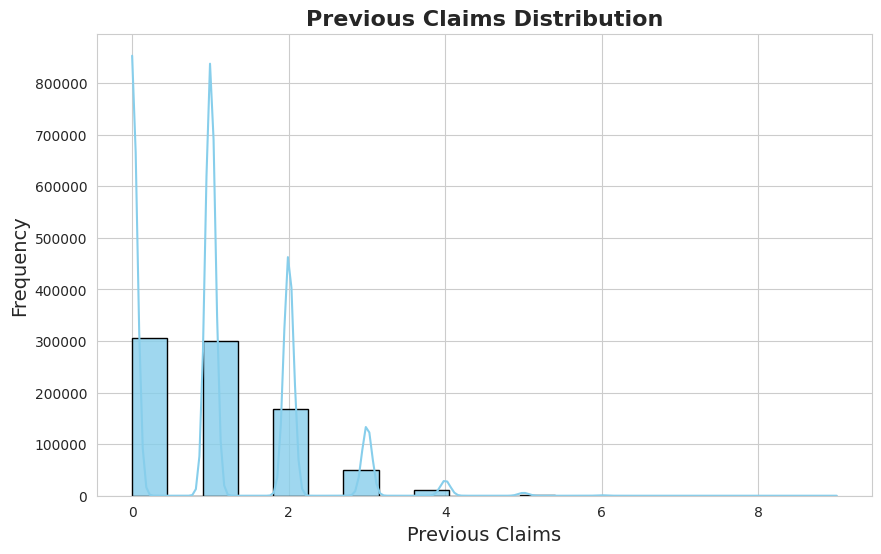

In [13]:
plot_histogram(df_train, 'Previous Claims', bins=20, title='Previous Claims Distribution', xlabel='Previous Claims', kde=True, print_mean_median=True)

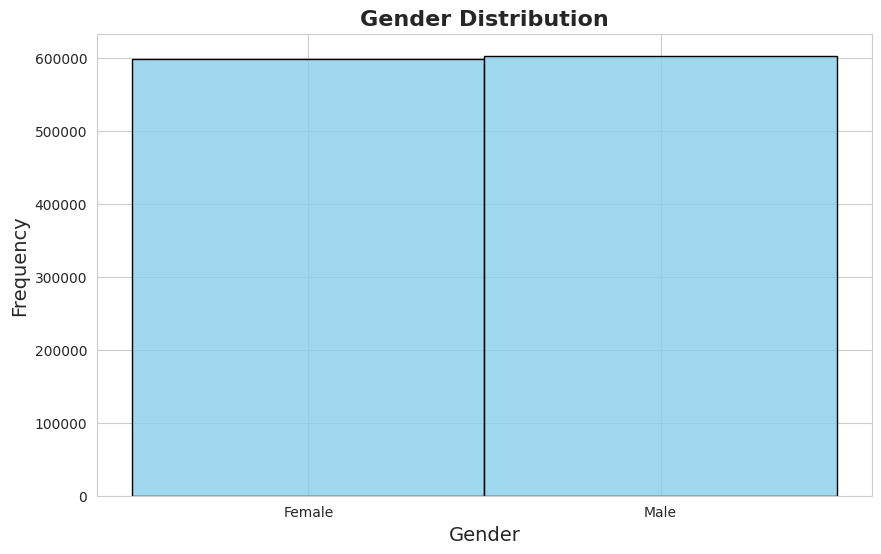

In [14]:
plot_histogram(df_train, 'Gender', bins=16, title='Gender Distribution', xlabel='Gender')

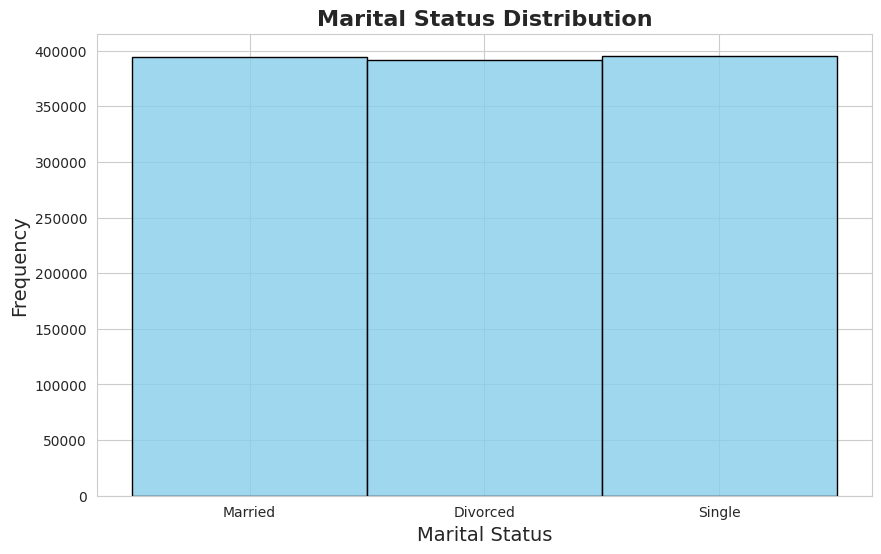

In [15]:
plot_histogram(df_train, 'Marital Status', bins=20, title='Marital Status Distribution', xlabel='Marital Status')

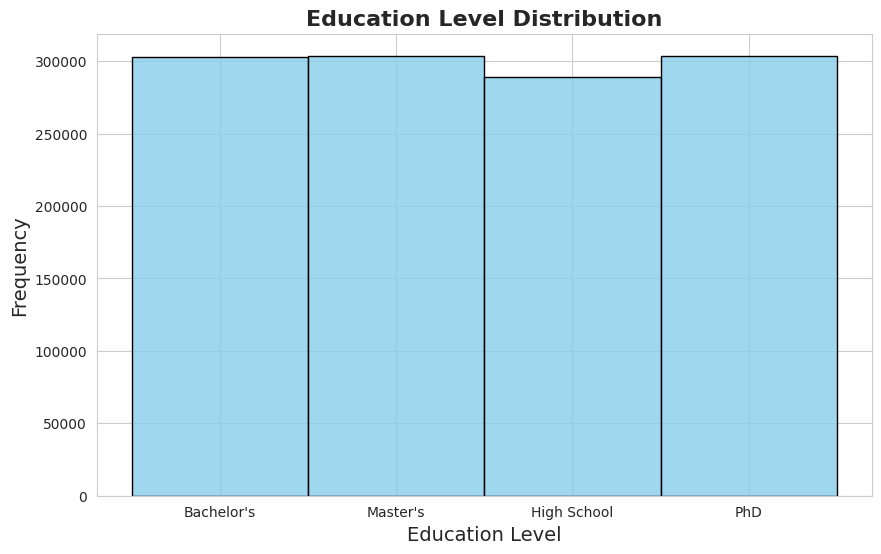

In [16]:
plot_histogram(df_train, 'Education Level', bins=20, title='Education Level Distribution', xlabel='Education Level')

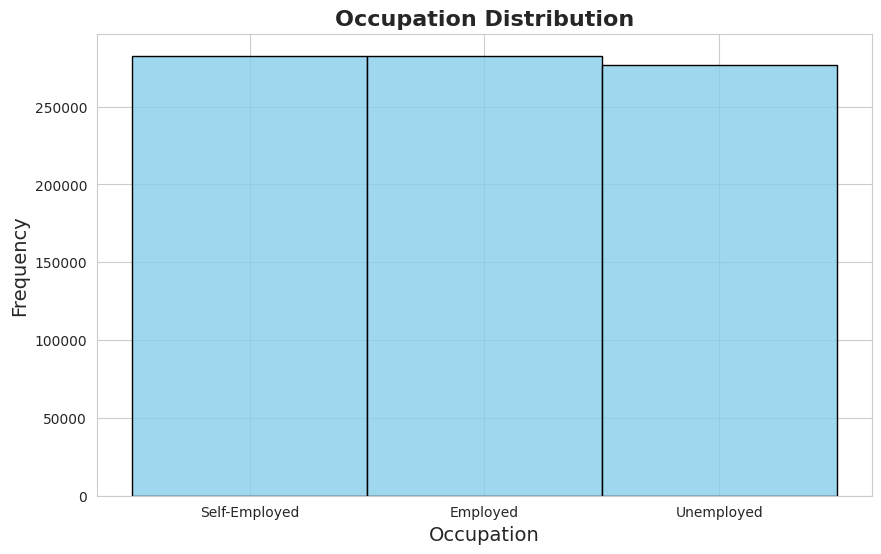

In [17]:
plot_histogram(df_train, 'Occupation', bins=20, title='Occupation Distribution', xlabel='Occupation')

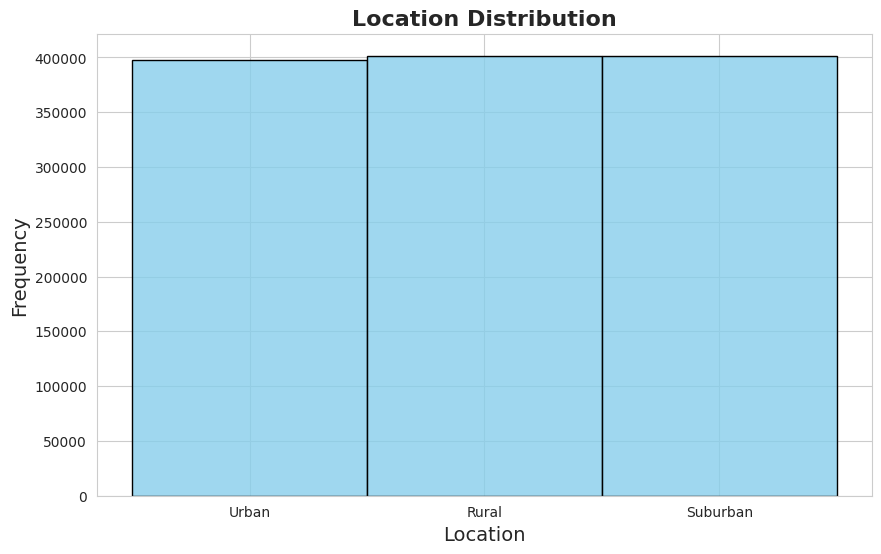

In [18]:
plot_histogram(df_train, 'Location', bins=20, title='Location Distribution', xlabel='Location')

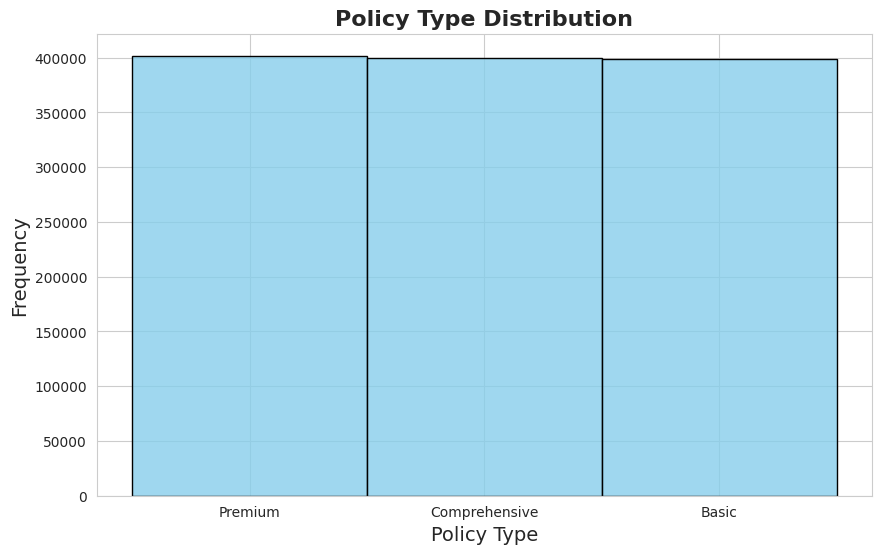

In [19]:
plot_histogram(df_train, 'Policy Type', bins=20, title='Policy Type Distribution', xlabel='Policy Type')

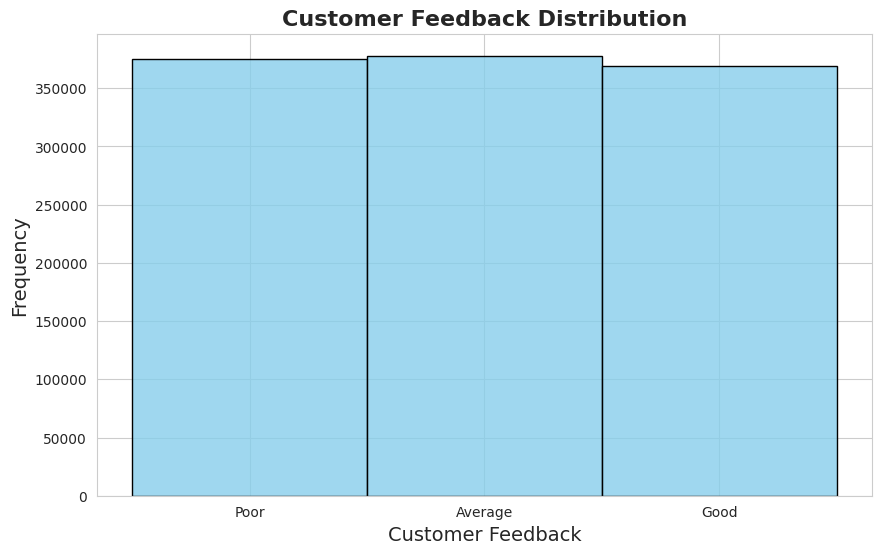

In [20]:
plot_histogram(df_train, 'Customer Feedback', bins=20, title='Customer Feedback Distribution', xlabel='Customer Feedback')

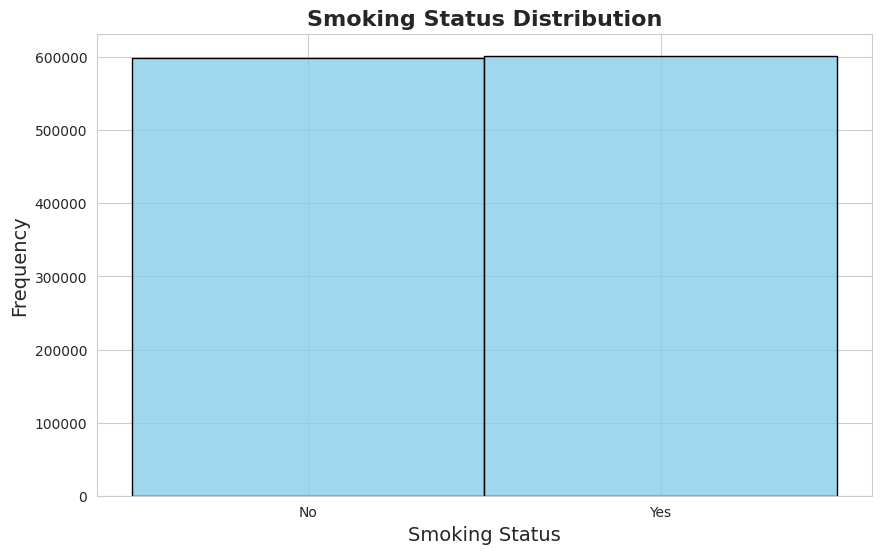

In [21]:
plot_histogram(df_train, 'Smoking Status', bins=20, title='Smoking Status Distribution', xlabel='Smoking Status')

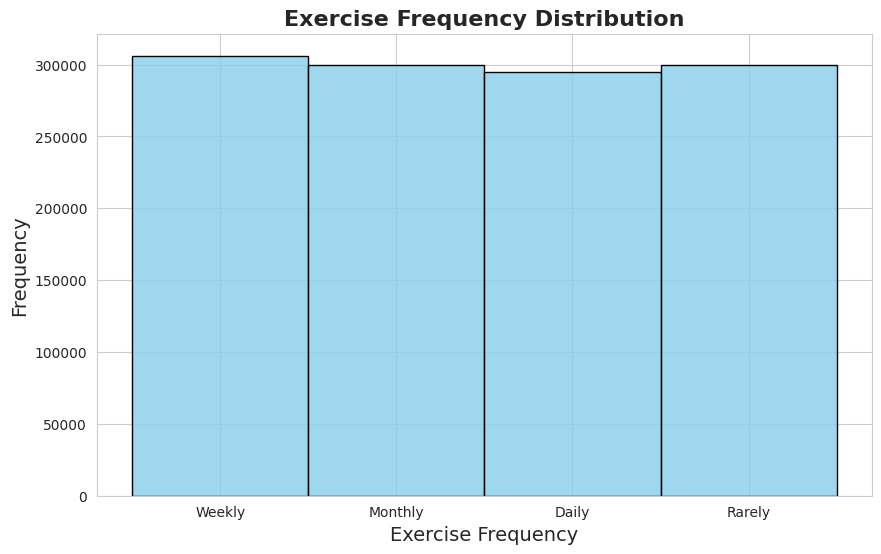

In [22]:
plot_histogram(df_train, 'Exercise Frequency', bins=20, title='Exercise Frequency Distribution', xlabel='Exercise Frequency')

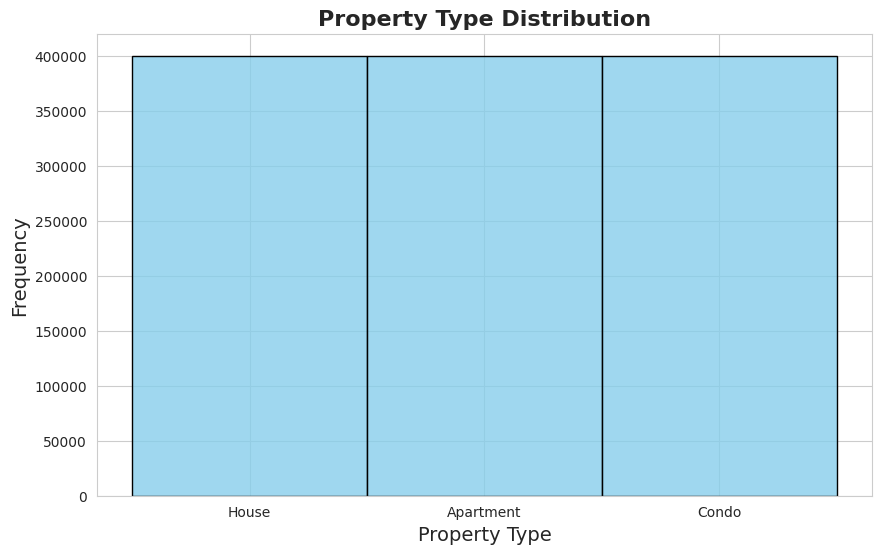

In [23]:
plot_histogram(df_train, 'Property Type', bins=20, title='Property Type Distribution', xlabel='Property Type')

mean: 9.57
median: 10.00


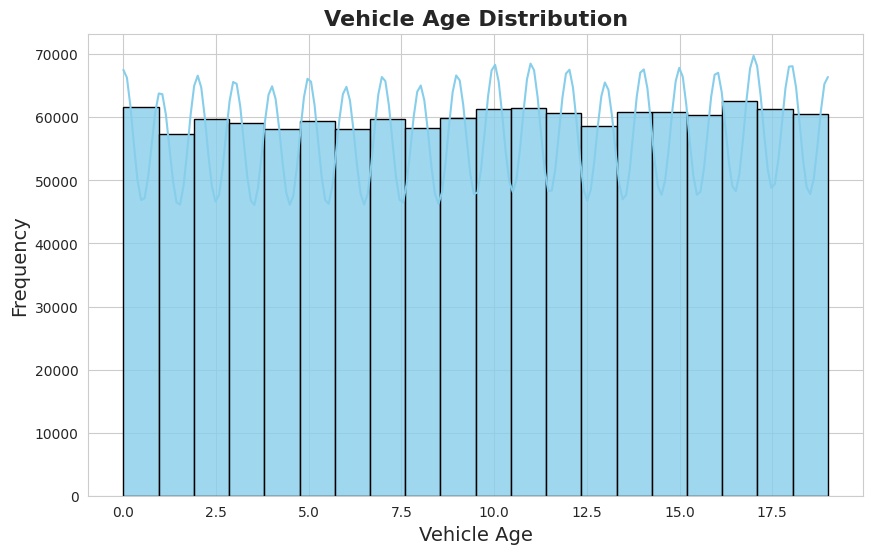

In [24]:
plot_histogram(df_train, 'Vehicle Age', bins=20, title='Vehicle Age Distribution', xlabel='Vehicle Age', kde=True, print_mean_median=True)

mean: 592.92
median: 595.00


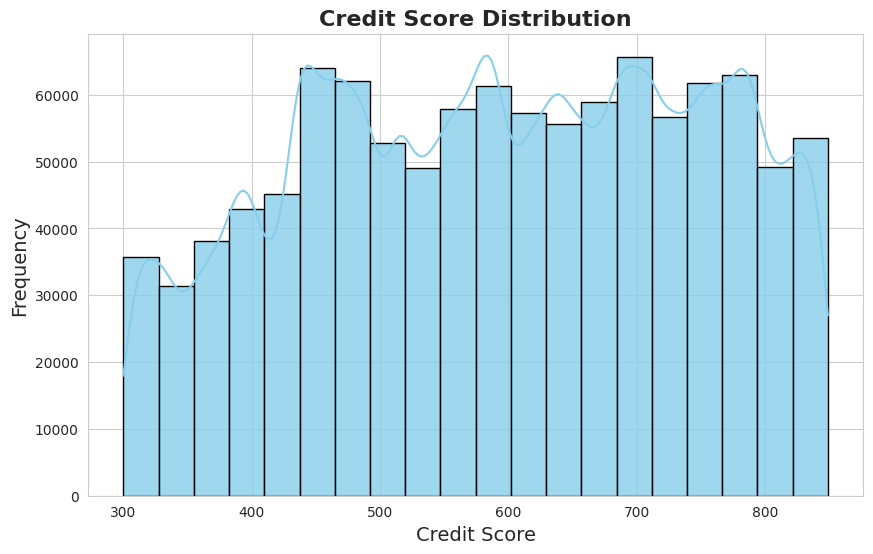

In [25]:
plot_histogram(df_train, 'Credit Score', bins=20, title='Credit Score Distribution', xlabel='Credit Score', kde=True, print_mean_median=True)

mean: 5.02
median: 5.00


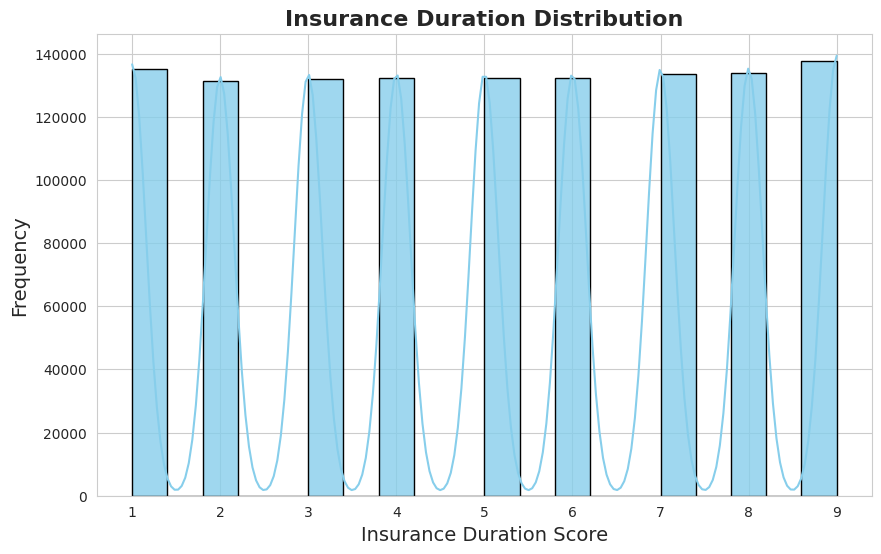

In [26]:
plot_histogram(df_train, 'Insurance Duration', bins=20, title='Insurance Duration Distribution', xlabel='Insurance Duration Score', kde=True, print_mean_median=True)

# Preprocesses Data

In [27]:
df_train.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [28]:
from time import perf_counter
from functools import wraps

def timeit(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = perf_counter()
        result = func(*args, **kwargs)
        print(f"{func.__name__} took {perf_counter() - start:.2f} seconds")
        return result
    return wrapper

In [29]:
@timeit
def preprocess_data(
    df: pd.DataFrame,
    ordinal_encoder: OrdinalEncoder,
    target_encoder: TargetEncoder,
    is_test: bool = False
):
    """
    preprocess data

    1. impute missing data
    2. convert gender and smoking status to binary
    3. feature enginner
    4. enconding ordinal columns
    5. encoding category columns
    """
    if is_test: 
        X = df.drop(['id'], axis=1)
    else:
        X, y = df.drop(['id', 'Premium Amount'], axis=1), df['Premium Amount']
    
    # 1. impute missing data
    X['Age'] = X['Age'].fillna(X['Age'].mean())
    X['Annual Income'] = X['Annual Income'].fillna(X['Annual Income'].median())
    X['Marital Status'] = X['Marital Status'].fillna(X['Marital Status'].mode()[0])
    X['Number of Dependents'] = X['Number of Dependents'].fillna(X['Number of Dependents'].median())
    X['Occupation'] = X['Occupation'].fillna(X['Occupation'].mode()[0])
    X['Health Score'] = X['Health Score'].fillna(X['Health Score'].median())
    X['Previous Claims'] = X['Previous Claims'].fillna(X['Previous Claims'].median())
    X['Vehicle Age'] = X['Vehicle Age'].fillna(X['Vehicle Age'].mean())
    X['Credit Score'] = X['Credit Score'].fillna(X['Credit Score'].mean())
    X['Insurance Duration'] = X['Insurance Duration'].fillna(X['Insurance Duration'].mean())
    X['Customer Feedback'] = X['Customer Feedback'].fillna(X['Customer Feedback'].mode()[0])

    # 2. convert gender and smoking status to binary
    X['Gender'] = X['Gender'].map({'Male': 0, 'Female': 1})
    X['Smoking Status'] = X['Smoking Status'].map({'No': 0, 'Yes': 1})

    # 3. feature enginner
    X['Policy Start Date'] = pd.to_datetime(X['Policy Start Date'], errors='coerce')
    X['Days Since Start'] = (pd.to_datetime('today') - X['Policy Start Date']).dt.days
    X = X.drop('Policy Start Date', axis=1)
    
    # 4. encoding ordinal columns
    if is_test:
        X[['Education Level', 'Policy Type', 'Customer Feedback', 'Exercise Frequency']] = ordinal_encoder.transform(
            X[['Education Level', 'Policy Type', 'Customer Feedback', 'Exercise Frequency']]
        )
    else:
        X[['Education Level', 'Policy Type', 'Customer Feedback', 'Exercise Frequency']] = ordinal_encoder.fit_transform(
            X[['Education Level', 'Policy Type', 'Customer Feedback', 'Exercise Frequency']]
        )

    # 5. encoding category columns
    category_cols = X.select_dtypes(include=['object']).columns
    if is_test:
        X[category_cols] = target_encoder.transform(X[category_cols])
    else:
        X[category_cols] = target_encoder.fit_transform(X[category_cols], y)

    if is_test:
        return X
        
    return X, y

In [30]:
ordinal_map = {
    'Education Level': ["High School", "Bachelor's", "Master's", "PhD"],
    'Policy Type': ['Basic', 'Comprehensive', 'Premium'],
    'Customer Feedback': ['Poor', 'Average', 'Good'],
    'Exercise Frequency': ['Rarely', 'Monthly', 'Weekly', 'Daily'],
}

ordinal_encoder = OrdinalEncoder(categories=[ordinal_map[col] for col in ['Education Level', 'Policy Type', 'Customer Feedback', 'Exercise Frequency']])

In [31]:
target_encoder = TargetEncoder(smooth="auto", target_type='continuous', cv=5, random_state=42)

In [32]:
X, y = preprocess_data(df_train, ordinal_encoder, target_encoder)

preprocess_data took 2.87 seconds


# Training, testing and evaluating Model

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"shape train: {X_train.shape}, val: {X_val.shape}")

shape train: (960000, 19), val: (240000, 19)


### XGBoost

In [34]:
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}")

MSE: 714302.68, RMSE: 845.16


### Lightgbm 

In [35]:
lgbm = LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.113631 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1179
[LightGBM] [Info] Number of data points in the train set: 960000, number of used features: 19
[LightGBM] [Info] Start training from score 1102.505529
MSE: 710989.93, RMSE: 843.20


## Hypertuning

In [36]:
@timeit
def train_and_evaluate_model(
    model,
    X_train,
    y_train,
    X_val,
    y_val,
    param_grid: dict,
    cv: int = 3,
    scoring: str='neg_mean_squared_error',
    n_iter: int = 10
):
    """
    trains a give model using RandomizedSearchCV and evaluates its performace.

    Args:
        model: a scikit-learn estimator.
        X_train (pd.DataFrame or np.array): training features.
        y_train (pd.Series or np.array): training target.
        X_val (pd.DataFrame or np.array): validation features.
        y_val (pd.Series or np.array): validation target.
        param_grid (dict): dictionary of hyperparamets for grid search.
        cv (int): number of cross-validation folds.
        scoring (str): scoring metric to use for grid search (default: neg MSE).
        
    Returns:
        dict: dictionary containing the best estimator, best pararamets (if grid searh was used)
        and evaluation metrics (MSE, RMSE, R2) on the val data.
    """

    grid_search = RandomizedSearchCV(
        estimator=model, 
        param_distributions=param_grid, 
        cv=cv, 
        scoring=scoring,
        n_jobs=-1,
        n_iter=n_iter,
        verbose=1,
    )
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    y_pred = best_model.predict(X_val)

    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)

    return {
        'best_model': best_model,
        'best_params': best_params,
        'mse': mse,
        'rmse': rmse,
    }

In [37]:
models = {
    'LGBMRegressor': {
        'estimator': LGBMRegressor(random_state=42),
        'param_grid': {
            'num_leaves': [31, 50, 70],
            'max_depth': [10, 20, 30],
            'learning_rate': [0.05, 0.1, 0.15],
            'n_estimators': [50, 100, 200]
        }
    },
    'XGBRegressor': {
        'estimator': XGBRegressor(random_state=42, objective='reg:squarederror'),
        'param_grid': {
            'n_estimators': [50, 100],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    }
}

results = {}
for model_name, model_info in models.items():
    print(f'training {model_name}...')
    res = train_and_evaluate_model(
        model_info['estimator'], 
        X_train, 
        y_train, 
        X_val, 
        y_val,
        param_grid=model_info['param_grid'], 
    )
    results[model_name] = res
    print(f"{model_name} -- MSE: {res['mse']:.2f}, RMSE: {res['rmse']:.2f}")
    print("best paramaters:", res['best_params'])
    print("=" * 40)

training LGBMRegressor...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1179
[LightGBM] [Info] Number of data points in the train set: 960000, number of used features: 19
[LightGBM] [Info] Start training from score 1102.505529
train_and_evaluate_model took 141.22 seconds
LGBMRegressor -- MSE: 710512.27, RMSE: 842.92
best paramaters: {'num_leaves': 70, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.05}
training XGBRegressor...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
train_and_evaluate_model took 50.33 seconds
XGBRegressor -- MSE: 712288.80, RMSE: 843.97
best paramaters: {'n_estimators': 100, 'max_depth': 7, 'lear

In [38]:
xgb = results['LGBMRegressor']['best_model']
X = preprocess_data(df_test, ordinal_encoder, target_encoder, is_test=True)

y_pred = xgb.predict(X)

df_test['Premium Amount'] = y_pred
df_test[['id', 'Premium Amount']].to_csv('/kaggle/working/submission.csv', index=False)

preprocess_data took 1.58 seconds
